# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port blair
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | katsuura
Processing Record 7 of Set 1 | bekasi
Processing Record 8 of Set 1 | quepos
Processing Record 9 of Set 1 | visby
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | sao tome
Processing Record 15 of Set 1 | sorong
Processing Record 16 of Set 1 | la passe
Processing Record 17 of Set 1 | ngama
Processing Record 18 of Set 1 | sparti
Processing Record 19 of Set 1 | minas de marcona
Processing Record 20 of Set 1 | zhanaozen
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | gourdon
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port blair,11.6667,92.7500,27.26,62,35,3.26,IN,1707362773
1,hermanus,-34.4187,19.2345,17.67,80,78,3.76,ZA,1707362773
2,codrington,-38.2667,141.9667,19.92,52,0,6.34,AU,1707362773
3,port-aux-francais,-49.3500,70.2167,4.38,71,80,12.36,TF,1707362774
4,katsuura,35.1333,140.3000,9.04,69,85,4.17,JP,1707362774


In [6]:
# Export the City_Data into a csv 
city_data_df.to_csv("/Users/sumainhemani/Documents/Homework/python-api-challenge/output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port blair,11.6667,92.7500,27.26,62,35,3.26,IN,1707362773
1,hermanus,-34.4187,19.2345,17.67,80,78,3.76,ZA,1707362773
2,codrington,-38.2667,141.9667,19.92,52,0,6.34,AU,1707362773
3,port-aux-francais,-49.3500,70.2167,4.38,71,80,12.36,TF,1707362774
4,katsuura,35.1333,140.3000,9.04,69,85,4.17,JP,1707362774


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

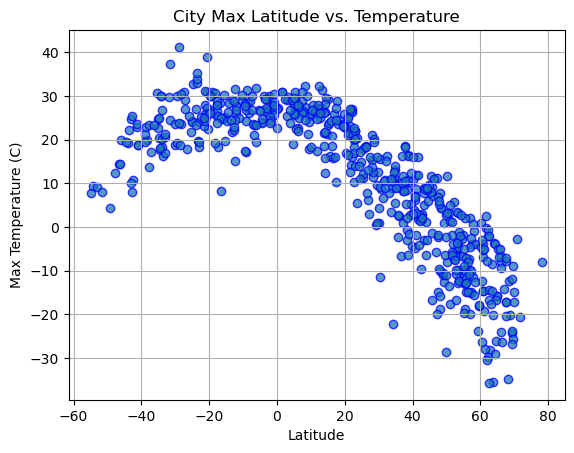

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha = 0.75, edgecolors= "b") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature")
plt.grid(True)
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

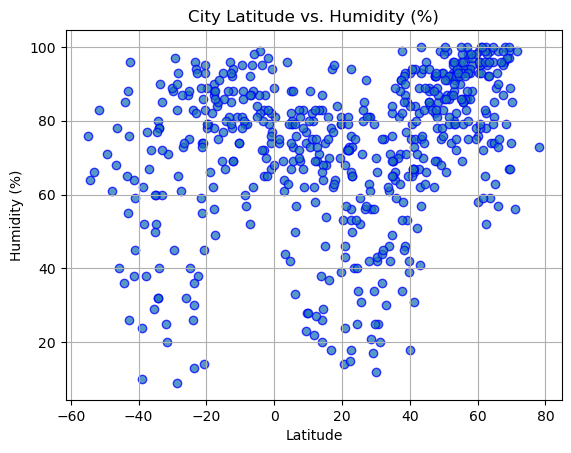

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha = 0.75, edgecolors= "b") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%)")
plt.grid(True)
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

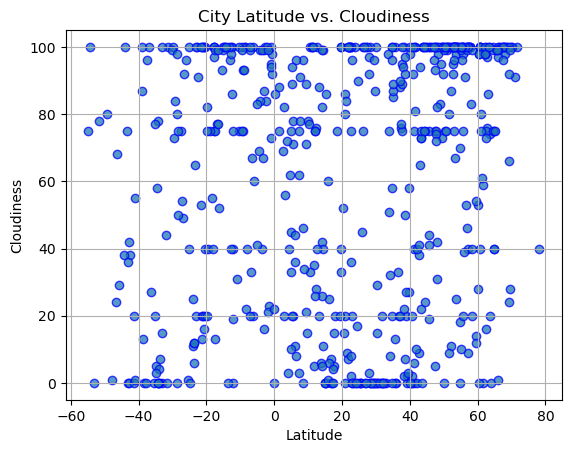

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha = 0.75, edgecolors= "b") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

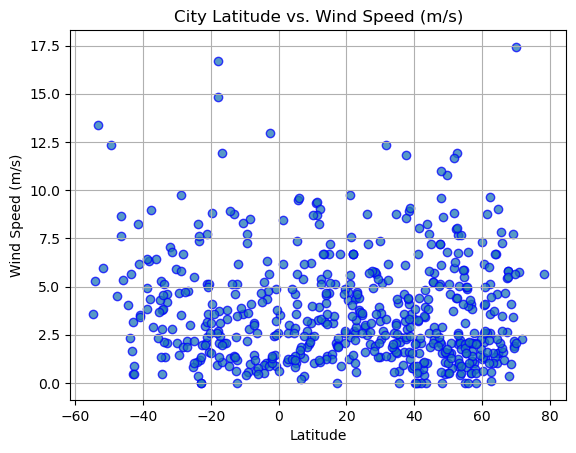

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha = 0.75, edgecolors= "b") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.grid(True)
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port blair,11.6667,92.7500,27.26,62,35,3.26,IN,1707362773
4,katsuura,35.1333,140.3000,9.04,69,85,4.17,JP,1707362774
6,quepos,9.4236,-84.1652,25.31,74,71,2.37,CR,1707362605
7,visby,57.6409,18.2960,-3.88,93,100,1.03,SE,1707362774
10,ust-nera,64.5667,143.2000,-26.20,96,100,1.03,RU,1707362775


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,17.67,80,78,3.76,ZA,1707362773
2,codrington,-38.2667,141.9667,19.92,52,0,6.34,AU,1707362773
3,port-aux-francais,-49.3500,70.2167,4.38,71,80,12.36,TF,1707362774
5,bekasi,-6.2349,106.9896,31.93,62,20,2.57,ID,1707362774
8,adamstown,-25.0660,-130.1015,24.20,75,100,5.52,PN,1707362774


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8908181254632371


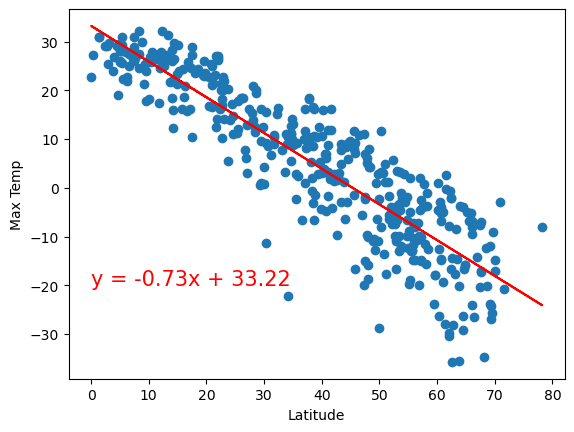

In [15]:
# Linear regression on Northern Hemisphere
north_x_values = northern_hemi_df["Lat"]
north_y_values = northern_hemi_df["Max Temp"]
slope = linregress(north_x_values, north_y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x_values, north_y_values)

regress_values = north_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_x_values, north_y_values)
plt.plot(north_x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** Based on the linear regression, there is an inverse relationship between increasing latitude distance from the northern hempisphere (further from equator) and decreasing temperature. That means, the further one gets from the equator, the colder it gets. 

The r-value is 0.5087637500831524


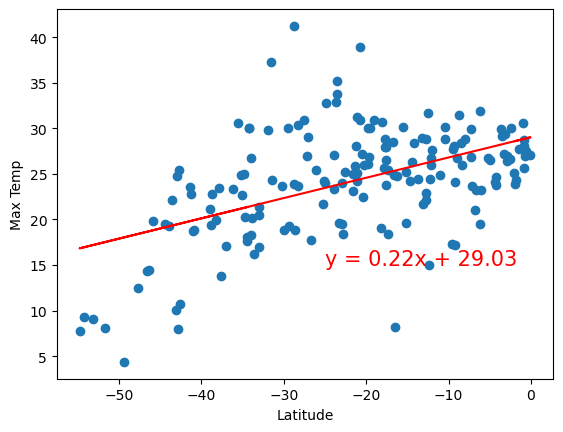

In [16]:
# Linear regression on Southern Hemisphere
south_x_values = southern_hemi_df["Lat"]
south_y_values = southern_hemi_df["Max Temp"]
slope = linregress(south_x_values, south_y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x_values, south_y_values)

regress_values = south_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot
plt.scatter(south_x_values, south_y_values)
plt.plot(south_x_values, regress_values, "-r")
plt.annotate(line_eq,(-25, 15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')


**Discussion about the linear relationship:** Based on the linear regression, there is a positive relationship between increasing latitude distance from the southern hempisphere (closer to equator) and increasing temperature. That means, the closer one gets to the equator, the warmer it gets. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.4638666848390134


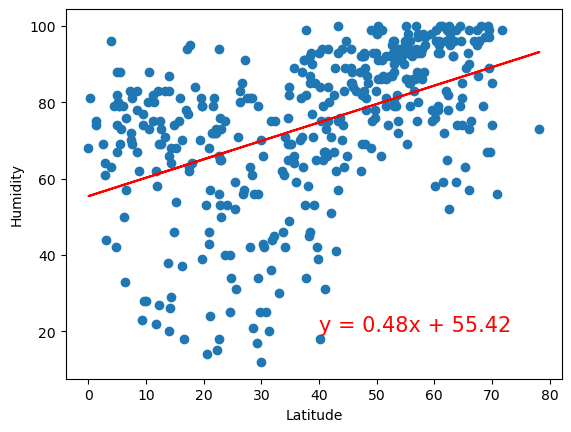

In [17]:
# Northern Hemisphere
north_x_values = northern_hemi_df["Lat"]
north_y_values = northern_hemi_df["Humidity"]
slope = linregress(north_x_values, north_y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x_values, north_y_values)

regress_values = north_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_x_values, north_y_values)
plt.plot(north_x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')


The r-value is 0.3822383862779991


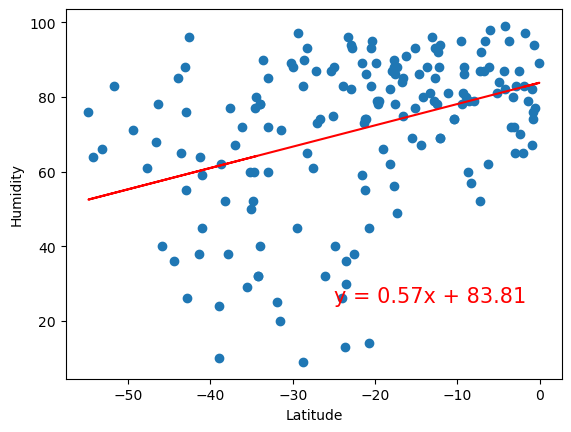

In [18]:
# Southern Hemisphere
south_x_values = southern_hemi_df["Lat"]
south_y_values = southern_hemi_df["Humidity"]
slope = linregress(south_x_values, south_y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x_values, south_y_values)

regress_values = south_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot
plt.scatter(south_x_values, south_y_values)
plt.plot(south_x_values, regress_values, "-r")
plt.annotate(line_eq,(-25, 25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** The relationship between latitude and humidity is slightly positive. Meaning, as the latitude becomes more positive (closer to the equator), the more humidity is present.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.3140307307712078


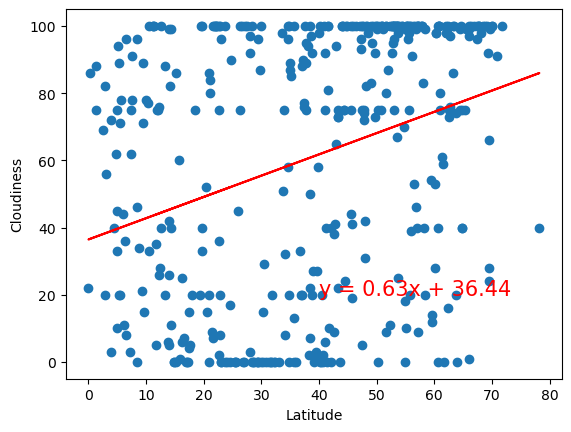

In [19]:
# Northern Hemisphere
north_x_values = northern_hemi_df["Lat"]
north_y_values = northern_hemi_df["Cloudiness"]
slope = linregress(north_x_values, north_y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x_values, north_y_values)

regress_values = north_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_x_values, north_y_values)
plt.plot(north_x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

The r-value is 0.3219710270558388


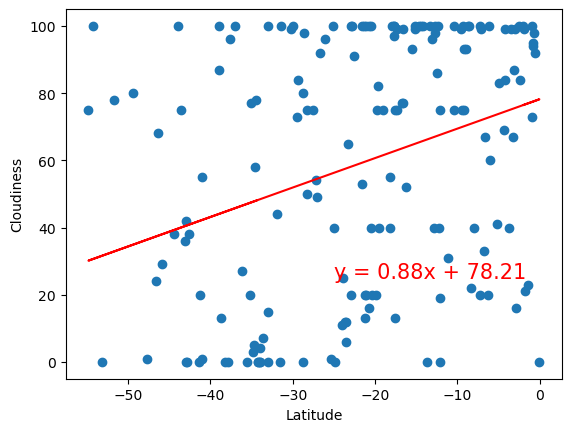

In [20]:
# Southern Hemisphere
south_x_values = southern_hemi_df["Lat"]
south_y_values = southern_hemi_df["Cloudiness"]
slope = linregress(south_x_values, south_y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x_values, south_y_values)

regress_values = south_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot
plt.scatter(south_x_values, south_y_values)
plt.plot(south_x_values, regress_values, "-r")
plt.annotate(line_eq,(-25, 25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** It is hard to determine a significant relationship between cloudiness and latitude changes. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.040677975698001405


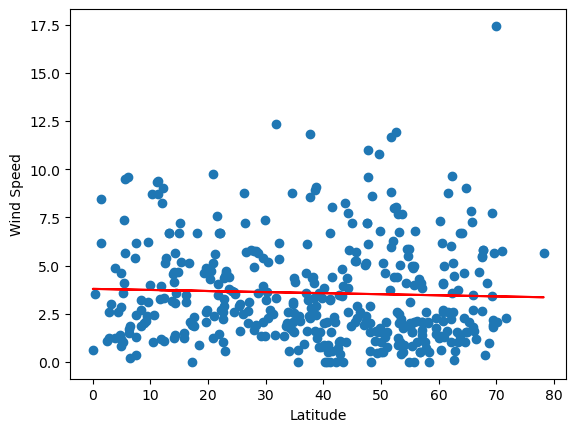

In [21]:
# Northern Hemisphere
north_x_values = northern_hemi_df["Lat"]
north_y_values = northern_hemi_df["Wind Speed"]
slope = linregress(north_x_values, north_y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x_values, north_y_values)

regress_values = north_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_x_values, north_y_values)
plt.plot(north_x_values, regress_values, "-r")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

The r-value is -0.20642079205054983


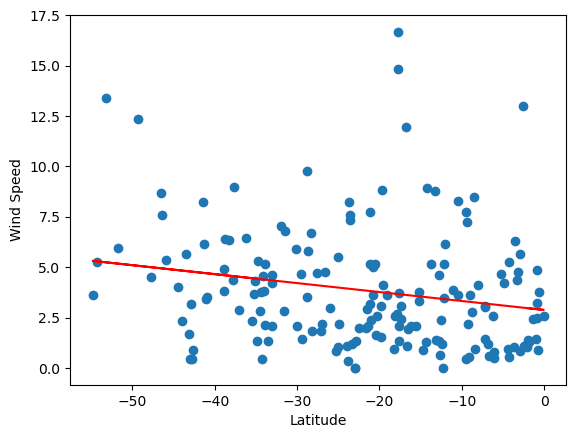

In [22]:
# Southern Hemisphere
south_x_values = southern_hemi_df["Lat"]
south_y_values = southern_hemi_df["Wind Speed"]
slope = linregress(south_x_values, south_y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x_values, south_y_values)

regress_values = south_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot
plt.scatter(south_x_values, south_y_values)
plt.plot(south_x_values, regress_values, "-r")
plt.annotate(line_eq,(-25, 25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** There really does not seem to be a significant relationship between wind speed and changing latitude as the values are scattered across the latitudes.